### <b>Kernel Principal Component Analysis - PCA</b>
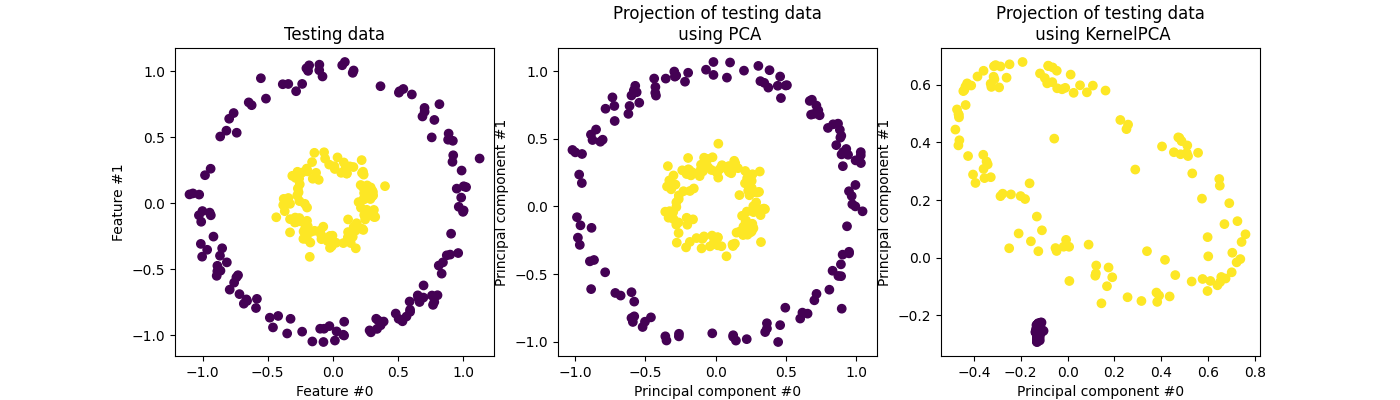
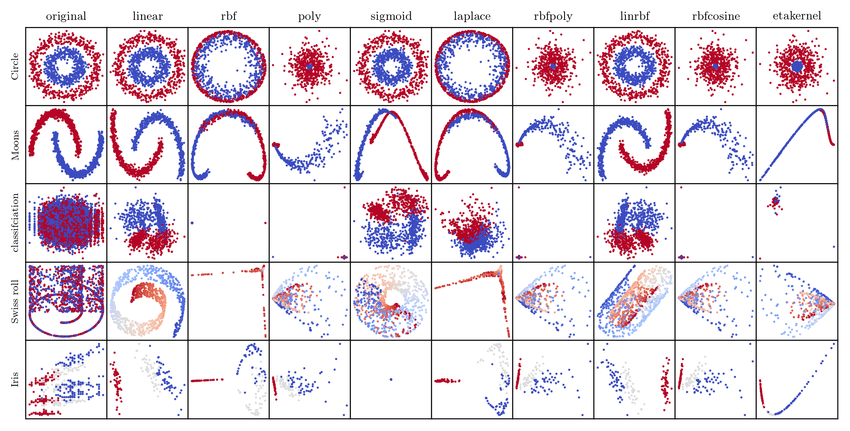
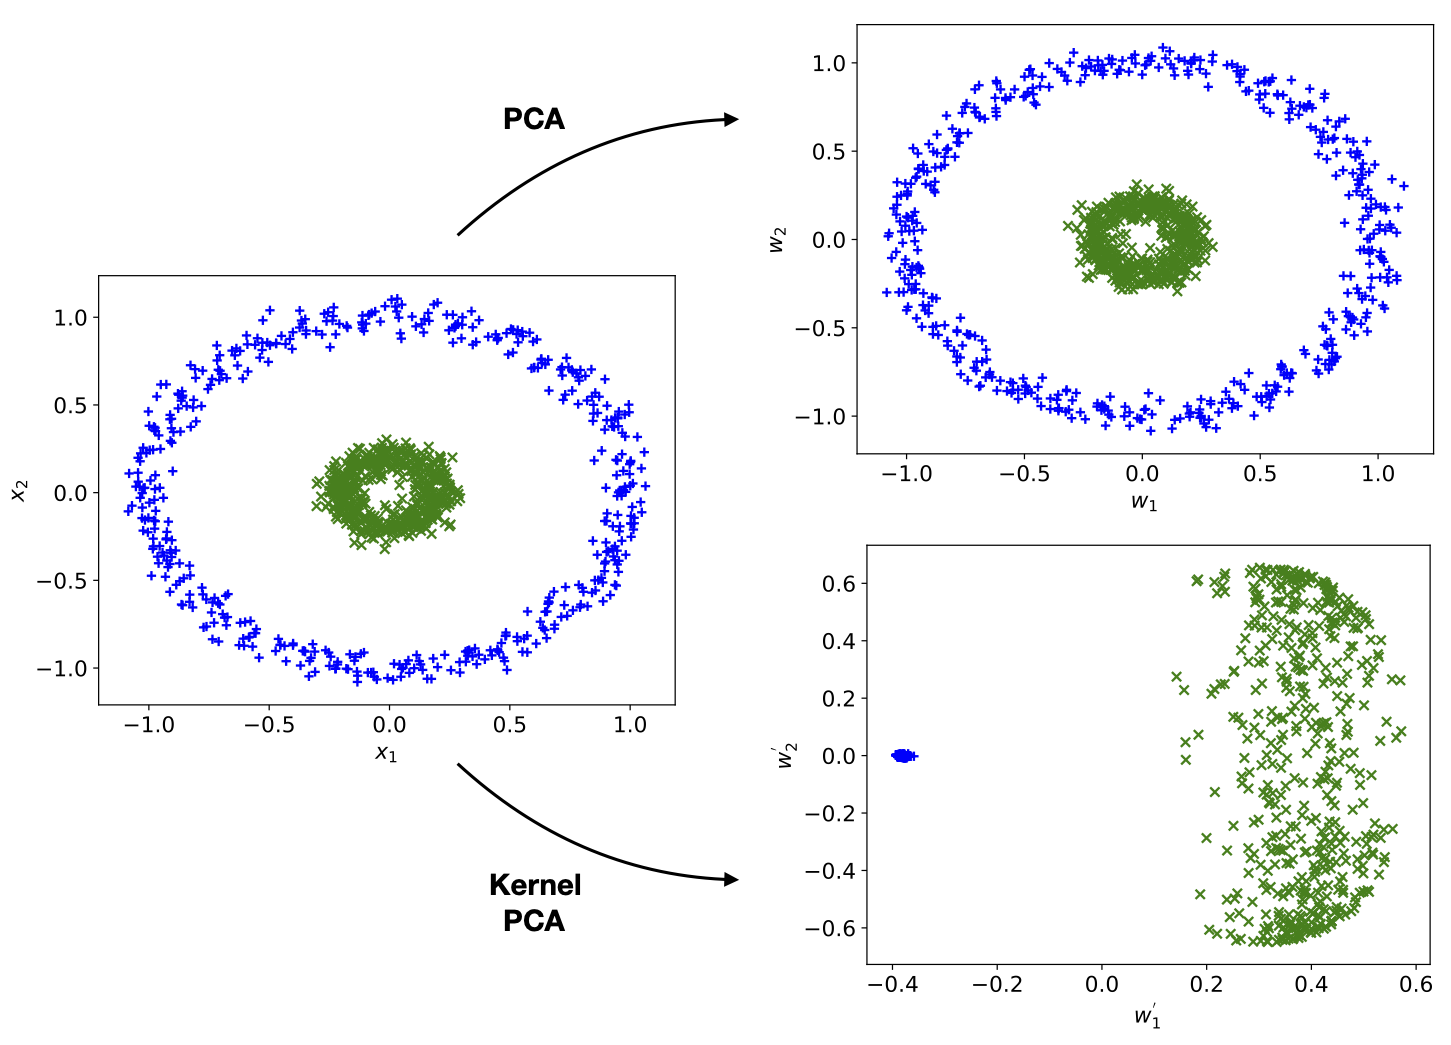
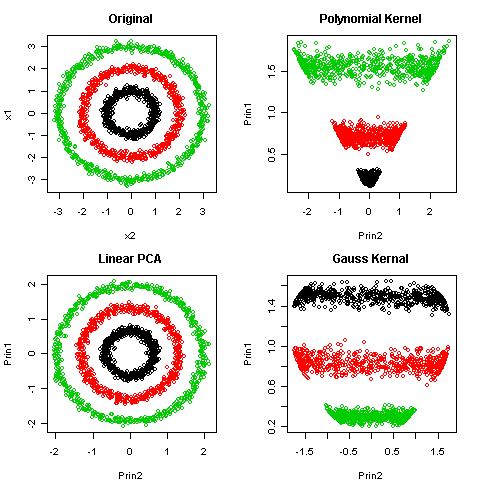
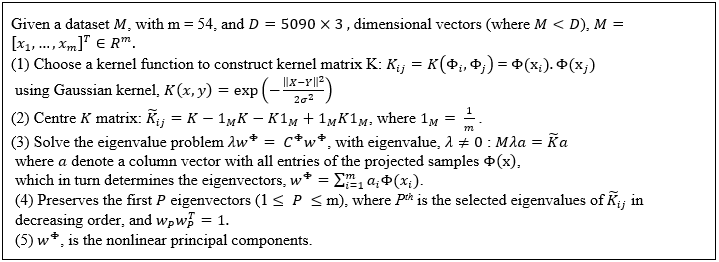

### <b>1. Loading/importing libraries</b>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### <b> 2. Data preprocessing</b>

In [37]:
dataset = pd.read_csv("Wine.csv")

print(f"Dataset: \n{dataset}\n")

description = dataset.describe()

print(f"Description: \n{description}\n")

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Dataset: 
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06     

##### <b>Feature scaling</b>

In [38]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-1.77649638 -0.21656119  3.15411499 ... -0.21338769  1.44504383
  -0.90076286]
 [-0.02677164 -0.57157263  0.79254502 ...  1.42810603  1.16959495
   0.68141724]
 [-0.2103092   0.63359778  0.83003026 ... -0.3861765  -0.7875418
  -0.5204311 ]
 ...
 [ 1.01327453  1.7173169  -0.0321302  ... -1.76848699 -1.52690458
  -0.85512304]
 [ 0.86644448 -0.79579038  0.41769265 ... -0.3861765   0.25626447
   1.59421345]
 [ 0.69514276 -0.58091503 -0.10710068 ...  0.47776756  0.27076178
   2.29402388]]

X_test: 
[[-6.14091835e-01 -5.15518191e-01 -1.53153971e+00  2.72606196e-01
  -1.06706738e+00 -2.82990479e-01 -2.36818039e-01 -3.13276829e-01
  -2.91900029e-01 -9.37691186e-01  2.61781546e-01  1.27107612e+00
  -2.70933471e-01]
 [-6.63035184e-01 -7.11708722e-01 -7.06864480e-01 -1.76484936e-01
   4.47443215e+00  2.05177274e-01  1.15270103e-01 -3.13276829e-01
   2.96898970e+00 -1.09208945e+00  7.80147981e-01 -9.16709558e-02
   5.35369847e-01]
 [-2.34780878e-01  1.01663643e+00 -3.32012104e-01 -2.67

#### <b>Applying kernel Principal Component Analysis</b>

In [39]:
kernel_pca = KernelPCA(n_components = 2, kernel = 'rbf')
kernel_pca.fit(X_train)
X_train = kernel_pca.transform(X_train)
X_test = kernel_pca.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-0.05078743 -0.06298527]
 [ 0.04318947 -0.06844616]
 [-0.4514083  -0.19003616]
 [-0.02144411  0.23766427]
 [ 0.53725764 -0.14996451]
 [-0.35470314 -0.30263569]
 [ 0.07195138  0.28854285]
 [-0.01951449  0.44321343]
 [-0.42951279 -0.28452365]
 [-0.38211669  0.33610369]
 [ 0.471558   -0.21975223]
 [-0.49928452 -0.32411373]
 [ 0.44789675 -0.2901651 ]
 [-0.43848051 -0.25046932]
 [-0.26183503 -0.25569374]
 [-0.22777155  0.31306168]
 [ 0.10247054  0.06413776]
 [-0.12675618  0.46921911]
 [ 0.29987032  0.10061059]
 [ 0.22389897 -0.04809121]
 [-0.12710522  0.40535543]
 [-0.39843404 -0.44036625]
 [ 0.53215545 -0.16035341]
 [ 0.52838724 -0.10795131]
 [ 0.51220142 -0.16483945]
 [ 0.13855144  0.27135546]
 [-0.38558855 -0.47636546]
 [-0.4898529  -0.22826343]
 [ 0.48805541  0.06696229]
 [ 0.33253139 -0.04104906]
 [-0.25649267  0.1165527 ]
 [-0.11719829  0.37687466]
 [ 0.54083669 -0.25168837]
 [-0.50593742 -0.37606523]
 [-0.05079238  0.40316359]
 [-0.40186647 -0.11624518]
 [-0.39262823 -0.4

### <b>3. Fitting/Creating Logistic Regression model - classifier</b>

In [40]:
logistic_regression_model = LogisticRegression(random_state = 0)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### <b>4. Evaluating the perfromance of Logistic Regression model after kernel-PCA.</b>

In [41]:
y_predicted = logistic_regression_model.predict(X_test)

print(f"y_predicted: \n{y_predicted}\n")
print(f"y_test: \n{y_test}\n")

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"Confusion matrix: \n{confusion_matrix_result}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"Accuracy score: {accuracy_score_result}\n")

y_predicted: 
[2 1 3 2 1 3 1 3 1 3 2 3 2 2 3 2 3 1 2 2 2 1 2 2 1 1 2 2 1 2 3 2 2 3 2 1 3
 1 3 3 3 3 3 2 3]

y_test: 
[2 2 3 2 1 3 1 3 1 3 2 3 2 2 3 2 3 1 2 2 2 1 2 2 1 1 2 2 1 2 3 2 2 3 2 1 3
 1 3 3 3 3 3 2 3]

Confusion matrix: 
[[10  0  0]
 [ 1 18  0]
 [ 0  0 16]]

Accuracy score: 0.9777777777777777



### <b>4. Visualizing the results</b>

#### <b>4.1 Training set</b>

C:\Users\PanCh\AppData\Local\Temp\ipykernel_24284\223163430.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


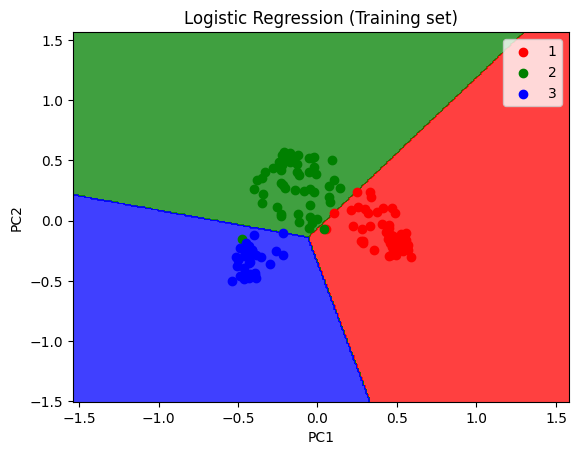

In [42]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic_regression_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### <b> 4.2 Test set</b>

C:\Users\PanCh\AppData\Local\Temp\ipykernel_24284\3329359034.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


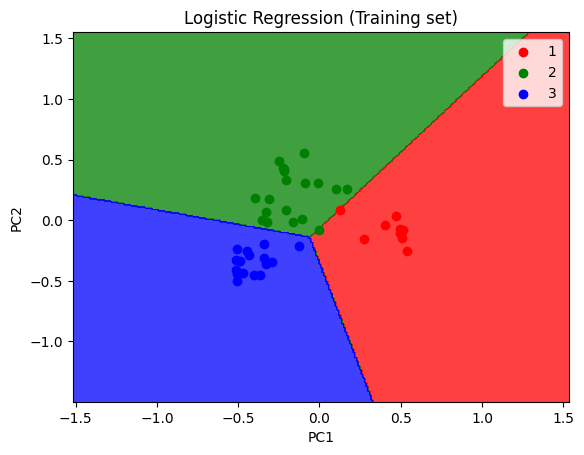

In [43]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic_regression_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()